<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Creation-d'image" data-toc-modified-id="Creation-d'image-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creation d'image</a></span></li><li><span><a href="#Reshape-et-normalize-chaque-image" data-toc-modified-id="Reshape-et-normalize-chaque-image-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reshape et normalize chaque image</a></span></li><li><span><a href="#Split-training-et-test" data-toc-modified-id="Split-training-et-test-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Split training et test</a></span></li><li><span><a href="#Creation-de-model" data-toc-modified-id="Creation-de-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Creation de model</a></span></li><li><span><a href="#IOU" data-toc-modified-id="IOU-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>IOU</a></span></li><li><span><a href="#Creation-Image" data-toc-modified-id="Creation-Image-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Creation Image</a></span></li></ul></div>

## Import

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["font.size"] = "15"

# Simple rectangle
## Creation d'image
- (1) Créer des rectangles de différentes formes formé 1 dans une boxe de 0 de taille 8X8 
- 

In [83]:
# Create images with random rectangles and bounding boxes. 
num_imgs = 50000

img_size = 8
min_object_size = 1
max_object_size = 4
num_objects = 1

bboxes = np.zeros((num_imgs, num_objects, 4))
imgs = np.zeros((num_imgs, img_size, img_size))  # set background to 0

for i_img in range(num_imgs):
    for i_object in range(num_objects):
        w, h = np.random.randint(min_object_size, max_object_size, size=2)
        x = np.random.randint(0, img_size - w)
        y = np.random.randint(0, img_size - h)
        imgs[i_img, x:x+w, y:y+h] = 1.  # set rectangle to 1
        bboxes[i_img, i_object] = [x, y, w, h]
        
imgs.shape, bboxes.shape

((50000, 8, 8), (50000, 1, 4))

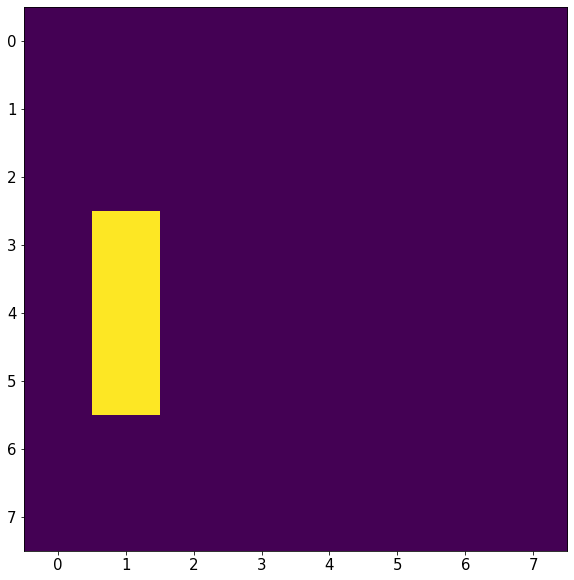

In [89]:
plt.imshow(imgs[0,:,:], interpolation='nearest')
plt.show()

In [85]:
bboxes[0,:,:]

array([[3., 1., 3., 1.]])

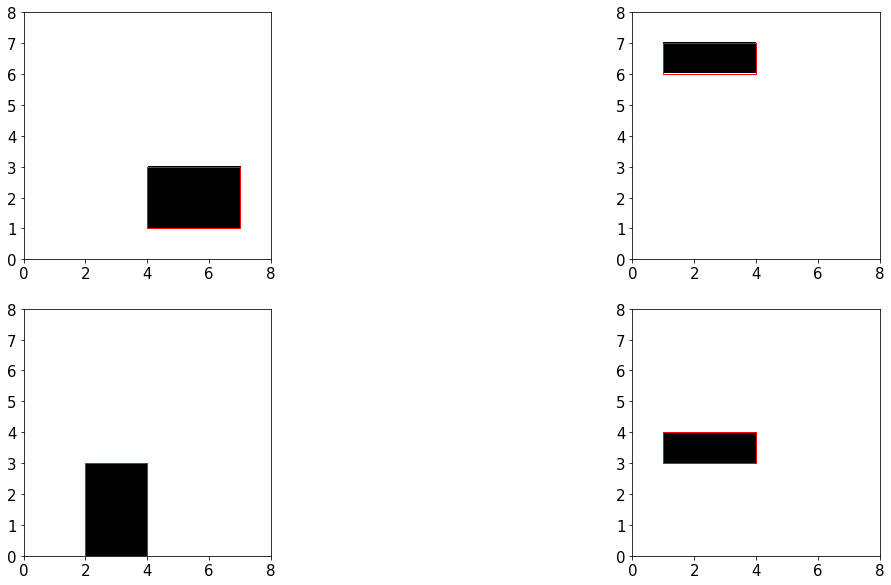

In [26]:
i = 0

for i in range(0,4):
    plt.subplot(2,2,(i+1))
    plt.imshow(imgs[i].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
    for bbox in bboxes[i]:
        plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec='r', fc='none'))

## Reshape et normalize chaque image

In [27]:
# Reshape and normalize the image data to mean 0 and std 1. 
X = (imgs.reshape(num_imgs, -1) - np.mean(imgs)) / np.std(imgs)
X.shape, np.mean(X), np.std(X)

((50000, 64), 5.785150136716766e-17, 1.0000000000000007)

In [28]:
# Normalize x, y, w, h by img_size, so that all values are between 0 and 1.
# Important: Do not shift to negative values (e.g. by setting to mean 0), because the IOU calculation needs positive w and h.
y = bboxes.reshape(num_imgs, -1) / img_size
y.shape, np.mean(y), np.std(y)

((50000, 4), 0.280928125, 0.17521352461777706)

## Split training et test

In [29]:
# Split training and test.
i = int(0.8 * num_imgs)
train_X = X[:i]
test_X = X[i:]
train_y = y[:i]
test_y = y[i:]
test_imgs = imgs[i:]
test_bboxes = bboxes[i:]

## Creation de model

In [32]:
# Build the model.
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
model = Sequential([
        Dense(200, input_dim=X.shape[-1]), 
        Activation('relu'), 
        Dropout(0.2), 
        Dense(200),
        Dense(y.shape[-1])
    ])
model.compile('adadelta', 'mse')


In [33]:
# Train.
model.fit(train_X, train_y, epochs=50, validation_data=(test_X, test_y), verbose=2)

Epoch 1/50


2022-05-29 11:56:16.806143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-29 11:56:20.377701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1250/1250 - 4s - loss: 0.3865 - val_loss: 0.2069 - 4s/epoch - 3ms/step
Epoch 2/50
1250/1250 - 4s - loss: 0.2700 - val_loss: 0.1420 - 4s/epoch - 3ms/step
Epoch 3/50
1250/1250 - 4s - loss: 0.2100 - val_loss: 0.1024 - 4s/epoch - 3ms/step
Epoch 4/50
1250/1250 - 4s - loss: 0.1707 - val_loss: 0.0774 - 4s/epoch - 3ms/step
Epoch 5/50
1250/1250 - 4s - loss: 0.1425 - val_loss: 0.0608 - 4s/epoch - 3ms/step
Epoch 6/50
1250/1250 - 4s - loss: 0.1220 - val_loss: 0.0494 - 4s/epoch - 3ms/step
Epoch 7/50
1250/1250 - 4s - loss: 0.1061 - val_loss: 0.0413 - 4s/epoch - 3ms/step
Epoch 8/50
1250/1250 - 4s - loss: 0.0932 - val_loss: 0.0354 - 4s/epoch - 3ms/step
Epoch 9/50
1250/1250 - 4s - loss: 0.0836 - val_loss: 0.0309 - 4s/epoch - 3ms/step
Epoch 10/50
1250/1250 - 4s - loss: 0.0745 - val_loss: 0.0273 - 4s/epoch - 3ms/step
Epoch 11/50
1250/1250 - 4s - loss: 0.0675 - val_loss: 0.0244 - 4s/epoch - 3ms/step
Epoch 12/50
1250/1250 - 4s - loss: 0.0616 - val_loss: 0.0220 - 4s/epoch - 3ms/step
Epoch 13/50
1250/1250 - 

In [34]:
# Predict bounding boxes on the test images.
pred_y = model.predict(test_X)
pred_bboxes = pred_y * img_size
pred_bboxes = pred_bboxes.reshape(len(pred_bboxes), num_objects, -1)
pred_bboxes.shape


2022-05-29 11:59:38.686165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(10000, 1, 4)

## IOU

In [35]:
def IOU(bbox1, bbox2):
    '''Calculate overlap between two bounding boxes [x, y, w, h] as the area of intersection over the area of unity'''
    x1, y1, w1, h1 = bbox1[0], bbox1[1], bbox1[2], bbox1[3]
    x2, y2, w2, h2 = bbox2[0], bbox2[1], bbox2[2], bbox2[3]

    w_I = min(x1 + w1, x2 + w2) - max(x1, x2)
    h_I = min(y1 + h1, y2 + h2) - max(y1, y2)
    if w_I <= 0 or h_I <= 0:  # no overlap
        return 0.
    I = w_I * h_I

    U = w1 * h1 + w2 * h2 - I

    return I / U

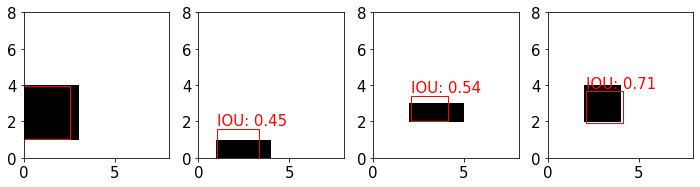

In [36]:
# Show a few images and predicted bounding boxes from the test dataset. 
plt.figure(figsize=(12, 3))
for i_subplot in range(1, 5):
    plt.subplot(1, 4, i_subplot)
    i = np.random.randint(len(test_imgs))
    plt.imshow(test_imgs[i].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
    for pred_bbox, exp_bbox in zip(pred_bboxes[i], test_bboxes[i]):
        plt.gca().add_patch(matplotlib.patches.Rectangle((pred_bbox[0], pred_bbox[1]), pred_bbox[2], pred_bbox[3], ec='r', fc='none'))
        plt.annotate('IOU: {:.2f}'.format(IOU(pred_bbox, exp_bbox)), (pred_bbox[0], pred_bbox[1]+pred_bbox[3]+0.2), color='r')
        
# plt.savefig('plots/bw-single-rectangle_prediction.png', dpi=300)


In [37]:
# Calculate the mean IOU (overlap) between the predicted and expected bounding boxes on the test dataset. 
summed_IOU = 0.
for pred_bbox, test_bbox in zip(pred_bboxes.reshape(-1, 4), test_bboxes.reshape(-1, 4)):
    summed_IOU += IOU(pred_bbox, test_bbox)
mean_IOU = summed_IOU / len(pred_bboxes)
mean_IOU

0.4270023905542659

# Multiple Form

## Creation Image

In [46]:
num_imgs = 50000

img_size = 16
min_rect_size = 3
max_rect_size = 8
num_objects = 2

bboxes = np.zeros((num_imgs, num_objects, 4))
imgs = np.zeros((num_imgs, img_size, img_size))
shapes = np.zeros((num_imgs, num_objects, 1))

for i_img in range(num_imgs):
    for i_object in range(num_objects):
        if np.random.choice([True, False]):
            width, height = np.random.randint(min_rect_size, max_rect_size, size=2)
            x = np.random.randint(0, img_size - width)
            y = np.random.randint(0, img_size - height)
            imgs[i_img, x:x+width, y:y+height] = 1.
            bboxes[i_img, i_object] = [x, y, width, height]
            shapes[i_img, i_object] = [0]
        else:
            size = np.random.randint(min_rect_size, max_rect_size)
            x, y = np.random.randint(0, img_size - size, size=2)
            mask = np.tril_indices(size)
            imgs[i_img, x + mask[0], y + mask[1]] = 1.
            bboxes[i_img, i_object] = [x, y, size, size]
            shapes[i_img, i_object] = [1]
            
imgs.shape, bboxes.shape

((50000, 16, 16), (50000, 2, 4))

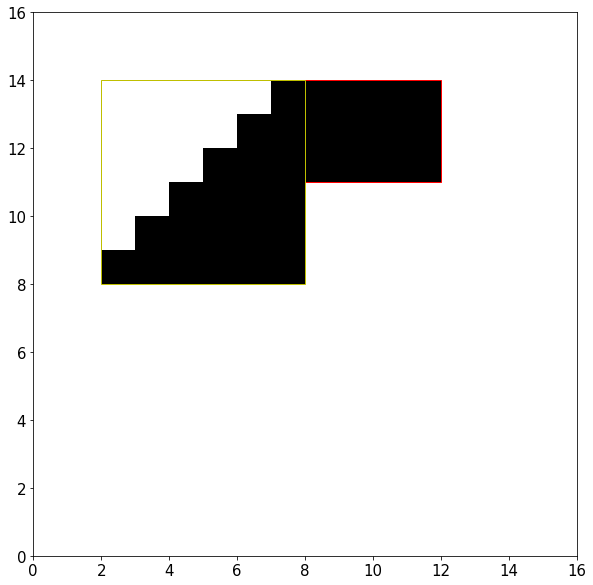

In [47]:
i = 0
# TODO: Why does the array have to be transposed?
plt.imshow(imgs[i].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
for bbox, shape in zip(bboxes[i], shapes[i]):
    plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], ec='r' if shape[0] == 0 else 'y', fc='none'))

In [48]:
X = (imgs.reshape(num_imgs, -1) - np.mean(imgs)) / np.std(imgs)
X.shape, np.mean(X), np.std(X)

((50000, 256), 7.482903185973556e-17, 0.9999999999999991)

In [49]:
y = np.concatenate([bboxes / img_size, shapes], axis=-1).reshape(num_imgs, -1)
y.shape

(50000, 10)

In [58]:
i = int(0.8 * num_imgs)
train_X = X[:i]
test_X = X[i:]
train_y = y[:i]
test_y = y[i:]
test_imgs = imgs[i:]
test_bboxes = bboxes[i:]

In [75]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD

model = Sequential([
        Dense(256, input_dim=X.shape[-1]), 
        Activation('relu'), 
        Dropout(0.4), 
        Dense(256, Activation('relu')), 
        Dropout(0.4), 
        Dense(256, Activation('relu')), 
        Dense(y.shape[-1])
    ])
model.compile('adadelta', 'mse')

In [76]:
# Flip bboxes during training.
# Note: The validation loss is always quite big here because we don't flip the bounding boxes for the validation data. 
def IOU(bbox1, bbox2):
    '''Calculate overlap between two bounding boxes [x, y, w, h] as the area of intersection over the area of unity'''
    x1, y1, w1, h1 = bbox1[0], bbox1[1], bbox1[2], bbox1[3]  # TODO: Check if its more performant if tensor elements are accessed directly below.
    x2, y2, w2, h2 = bbox2[0], bbox2[1], bbox2[2], bbox2[3]

    w_I = min(x1 + w1, x2 + w2) - max(x1, x2)
    h_I = min(y1 + h1, y2 + h2) - max(y1, y2)
    if w_I <= 0 or h_I <= 0:  # no overlap
        return 0
    I = w_I * h_I

    U = w1 * h1 + w2 * h2 - I

    return I / U

def dist(bbox1, bbox2):
    return np.sqrt(np.sum(np.square(bbox1[:2] - bbox2[:2])))

num_epochs_flipping = 50
num_epochs_no_flipping = 0  # has no significant effect
flipped_train_y = np.array(train_y)
flipped = np.zeros((len(flipped_train_y), num_epochs_flipping + num_epochs_no_flipping))
ious_epoch = np.zeros((len(flipped_train_y), num_epochs_flipping + num_epochs_no_flipping))
dists_epoch = np.zeros((len(flipped_train_y), num_epochs_flipping + num_epochs_no_flipping))
mses_epoch = np.zeros((len(flipped_train_y), num_epochs_flipping + num_epochs_no_flipping))

# TODO: Calculate ious directly for all samples (using slices of the array pred_y for x, y, w, h).
for epoch in range(num_epochs_flipping):
    print('Epoch', epoch)
    model.fit(train_X, flipped_train_y, epochs=1, validation_data=(test_X, test_y), verbose=2)
    pred_y = model.predict(train_X)

    for sample, (pred, exp) in enumerate(zip(pred_y, flipped_train_y)):
        
        # TODO: Make this simpler.
        pred = pred.reshape(num_objects, -1)
        exp = exp.reshape(num_objects, -1)
        
        pred_bboxes = pred[:, :4]
        exp_bboxes = exp[:, :4]
        
        # TODO: Try flipping array and see if results differ.
        ious = np.zeros((num_objects, num_objects))
        dists = np.zeros((num_objects, num_objects))
        mses = np.zeros((num_objects, num_objects))
        for i, exp_bbox in enumerate(exp_bboxes):
            for j, pred_bbox in enumerate(pred_bboxes):
                ious[i, j] = IOU(exp_bbox, pred_bbox)
                dists[i, j] = dist(exp_bbox, pred_bbox)
                mses[i, j] = np.mean(np.square(exp_bbox - pred_bbox))
                
        new_order = np.zeros(num_objects, dtype=int)
        
        
        for i in range(num_objects):
            # Find pred and exp bbox with maximum iou and assign them to each other (i.e. switch the positions of the exp bboxes in y).
            ind_exp_bbox, ind_pred_bbox = np.unravel_index(mses.argmin(), mses.shape)
            ious_epoch[sample, epoch] += ious[ind_exp_bbox, ind_pred_bbox]
            dists_epoch[sample, epoch] += dists[ind_exp_bbox, ind_pred_bbox]
            mses_epoch[sample, epoch] += mses[ind_exp_bbox, ind_pred_bbox]
            mses[ind_exp_bbox] = 1000000#-1  # set iou of assigned bboxes to -1, so they don't get assigned again
            mses[:, ind_pred_bbox] = 10000000#-1
            new_order[ind_pred_bbox] = ind_exp_bbox
        
        flipped_train_y[sample] = exp[new_order].flatten()
        
        flipped[sample, epoch] = 1. - np.mean(new_order == np.arange(num_objects, dtype=int))#np.array_equal(new_order, np.arange(num_objects, dtype=int))  # TODO: Change this to reflect the number of flips.
        ious_epoch[sample, epoch] /= num_objects
        dists_epoch[sample, epoch] /= num_objects
        mses_epoch[sample, epoch] /= num_objects
        
            
    print ('Flipped {} % of all elements'.format(np.mean(flipped[:, epoch]) * 100.))
    print ('Mean IOU: {}'.format(np.mean(ious_epoch[:, epoch])))
    print ('Mean dist: {}'.format(np.mean(dists_epoch[:, epoch])))
    print ('Mean mse: {}'.format(np.mean(mses_epoch[:, epoch])))
    print

Epoch 0


2022-05-29 12:27:40.489389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-29 12:27:46.064350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1250/1250 - 6s - loss: 0.5657 - val_loss: 0.1801 - 6s/epoch - 5ms/step


2022-05-29 12:27:46.909993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Flipped 50.2575 % of all elements
Mean IOU: 0.02603112512177118
Mean dist: 0.4220945871701916
Mean mse: 0.11544943600643434
Epoch 1
1250/1250 - 5s - loss: 0.3547 - val_loss: 0.1458 - 5s/epoch - 4ms/step
Flipped 15.67 % of all elements
Mean IOU: 0.05015996199862118
Mean dist: 0.35628173217751163
Mean mse: 0.08044009125809516
Epoch 2
1250/1250 - 6s - loss: 0.2963 - val_loss: 0.1342 - 6s/epoch - 4ms/step
Flipped 5.6125 % of all elements
Mean IOU: 0.058823692429958586
Mean dist: 0.3331819762423467
Mean mse: 0.07030607314311997
Epoch 3
1250/1250 - 5s - loss: 0.2576 - val_loss: 0.1265 - 5s/epoch - 4ms/step
Flipped 5.09 % of all elements
Mean IOU: 0.06394549636796766
Mean dist: 0.318393288412164
Mean mse: 0.06375983810531459
Epoch 4
1250/1250 - 5s - loss: 0.2299 - val_loss: 0.1207 - 5s/epoch - 4ms/step
Flipped 4.3425 % of all elements
Mean IOU: 0.0676995557833442
Mean dist: 0.30768127026896025
Mean mse: 0.05909146887236983
Epoch 5
1250/1250 - 6s - loss: 0.2086 - val_loss: 0.1162 - 6s/epoch - 

Flipped 0.7325 % of all elements
Mean IOU: 0.06807107856588251
Mean dist: 0.2665827398685788
Mean mse: 0.03724704728782213
Epoch 41
1250/1250 - 5s - loss: 0.0838 - val_loss: 0.0862 - 5s/epoch - 4ms/step
Flipped 0.66 % of all elements
Mean IOU: 0.0683403489624643
Mean dist: 0.2660531793854187
Mean mse: 0.03705305409680149
Epoch 42
1250/1250 - 5s - loss: 0.0833 - val_loss: 0.0860 - 5s/epoch - 4ms/step
Flipped 0.7100000000000001 % of all elements
Mean IOU: 0.06853426376681108
Mean dist: 0.2656001917944258
Mean mse: 0.03689124358325396
Epoch 43
1250/1250 - 6s - loss: 0.0827 - val_loss: 0.0857 - 6s/epoch - 5ms/step
Flipped 0.7100000000000001 % of all elements
Mean IOU: 0.06895979599810978
Mean dist: 0.2651796625973393
Mean mse: 0.036732184110722314
Epoch 44
1250/1250 - 5s - loss: 0.0820 - val_loss: 0.0854 - 5s/epoch - 4ms/step
Flipped 0.5575 % of all elements
Mean IOU: 0.0693189279915112
Mean dist: 0.264915870836968
Mean mse: 0.03658344683036967
Epoch 45
1250/1250 - 5s - loss: 0.0816 - val_

Text(0, 0.5, 'Training sample')

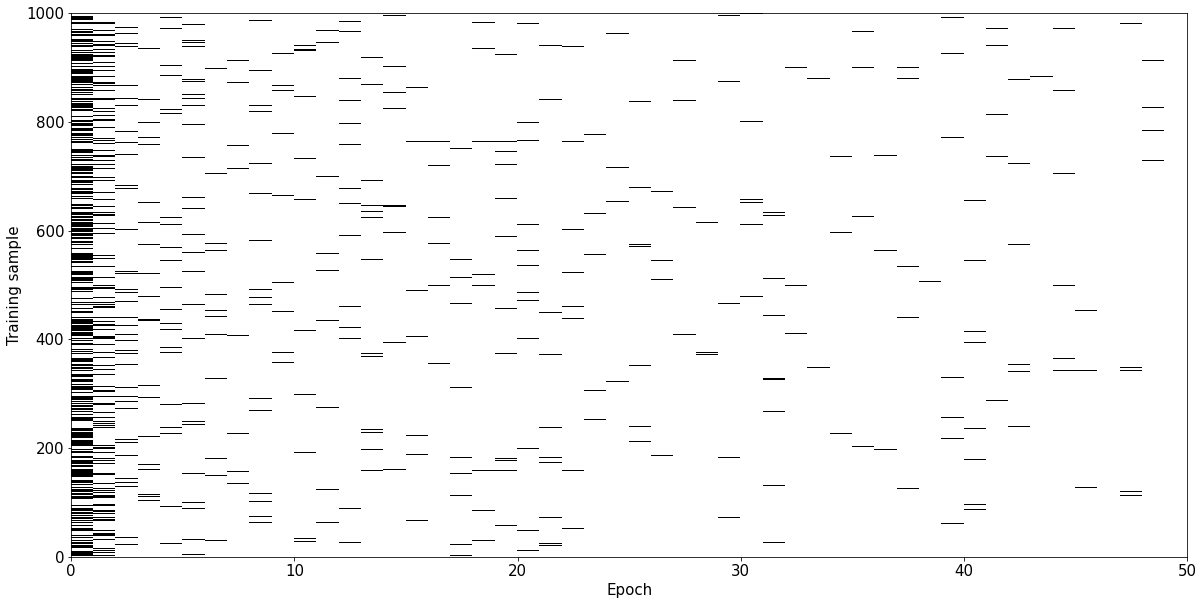

In [70]:
plt.pcolor(flipped[:1000], cmap='Greys', vmax=1.)
# plt.axvline(num_epochs_flipping, c='r')
plt.xlabel('Epoch')
plt.ylabel('Training sample')

(0.0, 1.0)

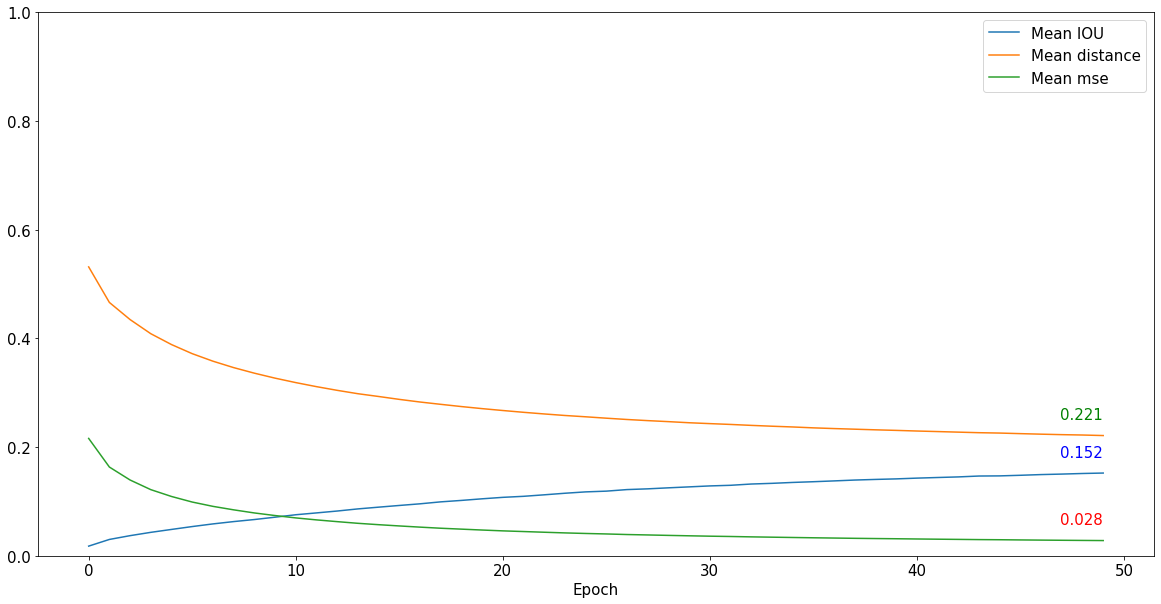

In [71]:
mean_ious_epoch = np.mean(ious_epoch, axis=0)
mean_dists_epoch = np.mean(dists_epoch, axis=0)
mean_mses_epoch = np.mean(mses_epoch, axis=0)
plt.plot(mean_ious_epoch, label='Mean IOU')  # between predicted and assigned true bboxes
plt.plot(mean_dists_epoch, label='Mean distance')  # relative to image size
plt.plot(mean_mses_epoch, label='Mean mse')  # relative to image size
plt.annotate(np.round(np.max(mean_ious_epoch), 3), (len(mean_ious_epoch)-1, mean_ious_epoch[-1]+0.03), horizontalalignment='right', color='b')
plt.annotate(np.round(np.min(mean_dists_epoch), 3), (len(mean_dists_epoch)-1, mean_dists_epoch[-1]+0.03), horizontalalignment='right', color='g')
plt.annotate(np.round(np.min(mean_mses_epoch), 3), (len(mean_mses_epoch)-1, mean_mses_epoch[-1]+0.03), horizontalalignment='right', color='r')
# plt.axvline(num_epochs_flipping, c='r')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0, 1)


In [72]:
pred_y = model.predict(test_X)
pred_y = pred_y.reshape(len(pred_y), num_objects, -1)
pred_bboxes = pred_y[..., :4] * img_size
pred_shapes = pred_y[..., 4:5]
pred_bboxes.shape, pred_shapes.shape

2022-05-29 12:25:57.489225: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


((10000, 2, 4), (10000, 2, 1))

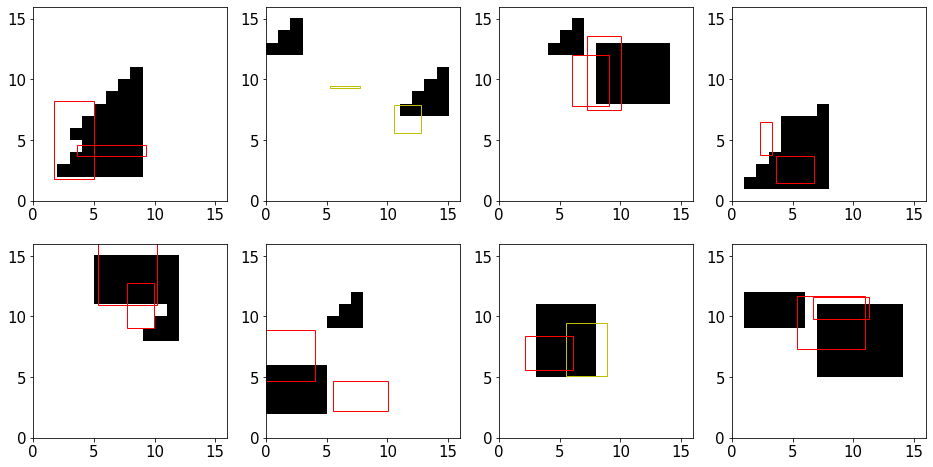

In [73]:
plt.figure(figsize=(16, 8))
for i_subplot in range(1, 9):
    plt.subplot(2, 4, i_subplot)
    i = np.random.randint(len(test_X))
    plt.imshow(test_imgs[i].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, img_size, 0, img_size])
    for pred_bbox, exp_bbox, pred_shape in zip(pred_bboxes[i], test_bboxes[i], pred_shapes[i]):
        plt.gca().add_patch(matplotlib.patches.Rectangle((pred_bbox[0], pred_bbox[1]), pred_bbox[2], pred_bbox[3], ec='r' if pred_shape[0] <= 0.5 else 'y', fc='none'))
